# SD212: Graph mining
## Lab 4: Graph clustering

In this lab, you will learn to cluster a graph and interpret the results. 

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

pip update

!pip install --upgrade --force-reinstall scikit-network

In [3]:
# if you get any error, please update scikit-network!
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, BiLouvain, modularity
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.linalg import normalize
from sknetwork.utils import membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph

## Data

We will work on the following graphs (see the [NetSets](https://graphs.telecom-paristech.fr/Home_page.html#netsets-section) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [5]:
graph = grid(9, 9, True)
adjacency = graph.adjacency
position = graph.position

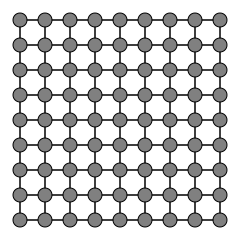

In [6]:
image = svg_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and display it with the labels.
* What is the modularity?
* Try the ``shuffle_nodes`` option and observe the results.
* Find a better clustering than Louvain in terms of modularity. **Hint:** Guess and calculate!

In [7]:
louvain = Louvain()

In [8]:
labels = louvain.fit_transform(adjacency)

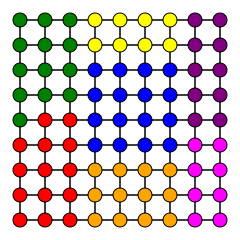

In [9]:
image = svg_graph(adjacency, position, labels = labels, width=200, height=200)
SVG(image)

In [10]:
modularity(adjacency = adjacency, labels= labels)

0.6220341435185185

Using shuffles nodes

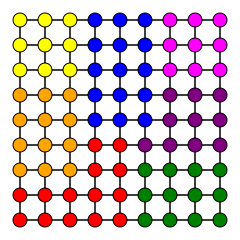

In [11]:
louvain = Louvain(shuffle_nodes=True)
labels = louvain.fit_transform(adjacency)
image = svg_graph(adjacency, position, labels = labels, width=200, height=200)
SVG(image)

In [12]:
print( modularity(adjacency = adjacency, labels= labels) )

0.6278452932098765


Improve modularity

In [13]:
n = adjacency.shape[0]
labels = np.array([((i%9)//3) * 3 + (i//9) // 3 for i in range(n)])

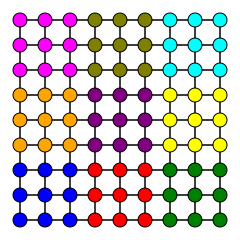

In [14]:
image = svg_graph(adjacency, position, labels=labels, width=200, height=200)
SVG(image)

In [15]:
print( modularity(adjacency = adjacency, labels= labels) )

0.638454861111111


## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [16]:
graph = karate_club(True)

In [17]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

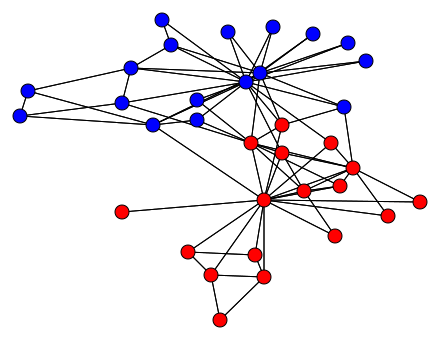

In [18]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by Louvain and display the labels.
* What is the modularity?
* Display the aggregate graph.
* Adapt the resolution to get 2 clusters. How many nodes are misclassified?

In [19]:
louvain = Louvain()

In [20]:
labels = louvain.fit_transform(adjacency)

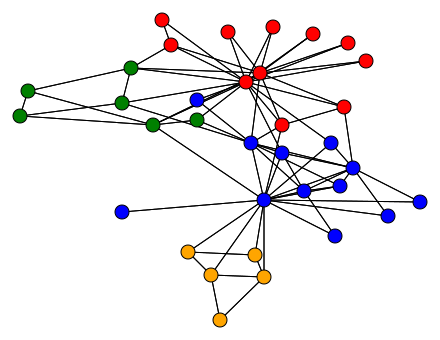

In [21]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [22]:
adjacency_aggregate = louvain.adjacency_

In [23]:
average = normalize(membership_matrix(labels).T)
position_aggregate = average.dot(position)

In [24]:
labels_unique, counts = np.unique(labels, return_counts=True)

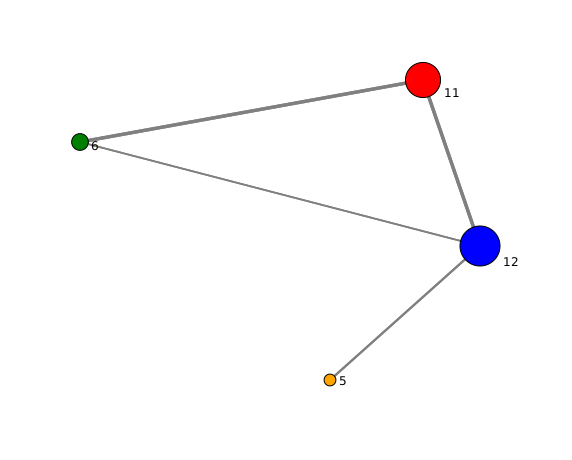

In [25]:
image = svg_graph(adjacency_aggregate, position_aggregate, names=counts, labels=labels_unique, display_node_weight=True)
SVG(image)

Modified

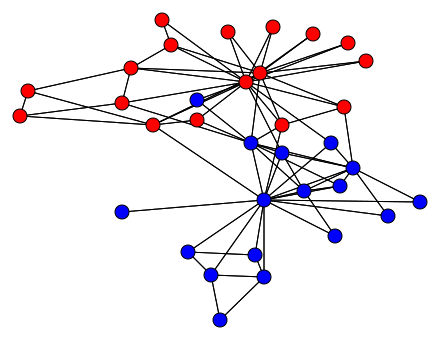

In [26]:
louvain = Louvain(resolution=0.5)
labels = louvain.fit_transform(adjacency)
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [27]:
print( modularity(adjacency = adjacency, labels= labels) )

0.3717948717948718


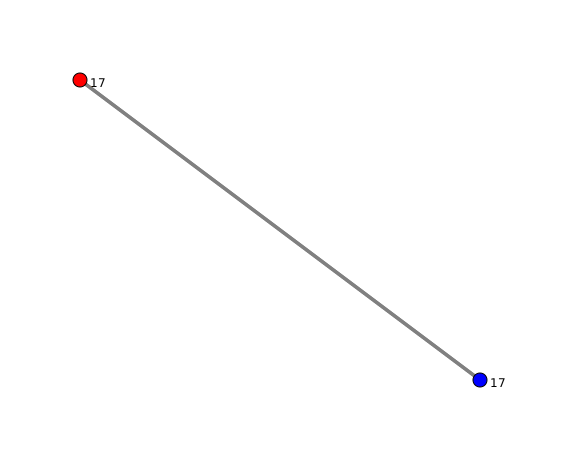

In [28]:
adjacency_aggregate = louvain.adjacency_
average = normalize(membership_matrix(labels).T)
position_aggregate = average.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)
image = svg_graph(adjacency_aggregate, position_aggregate, names=counts, labels=labels_unique, display_node_weight=True)
SVG(image)


In [29]:
misclassified = np.sum([labels_true ==  labels])
print(misclassified)

2


## Openflights


In [30]:
graph = openflights

In [31]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

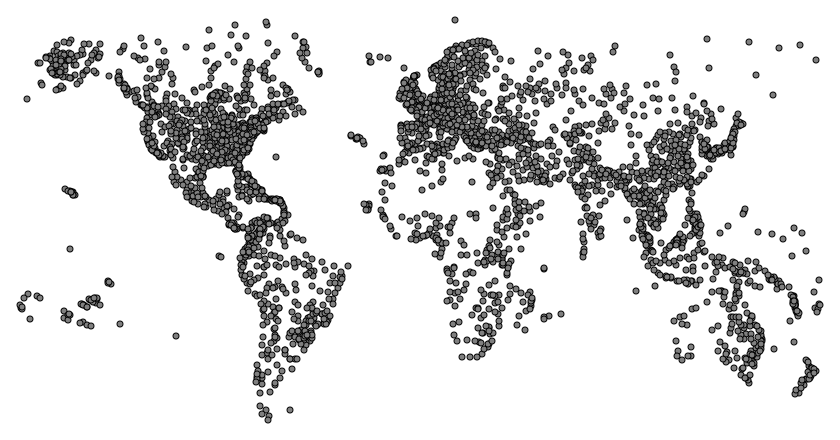

In [32]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? Check the parameters of the function ``modularity``.
* How do you interpret the *inverse* of the Simpson index?
* List the top airport of each cluster in number of flights.
* Display the aggregate graph with the cluster volumes and the name of the top airport of each cluster.
* What is the strongest cluster among those having more than 100 nodes? **Hint:** Use the aggregate graph.

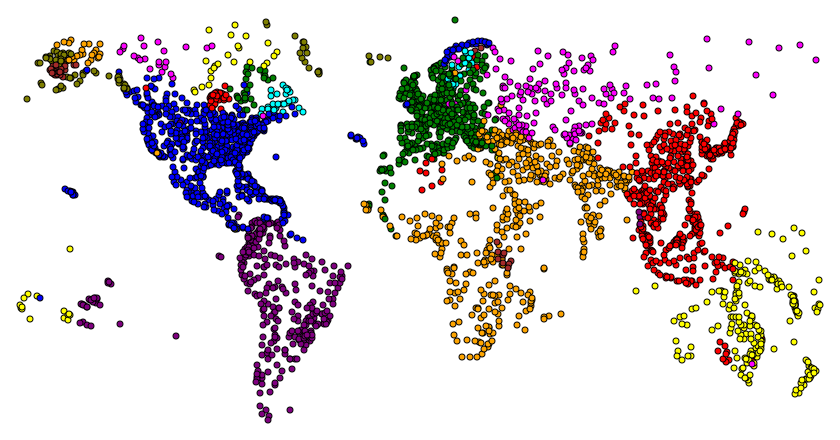

In [33]:
louvain = Louvain()
labels = louvain.fit_transform(adjacency)
image = svg_graph(adjacency, position, labels=labels, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

In [34]:
number_clusters = np.max(labels) + 1
print(number_clusters)

35


In [35]:
modularity_, fit, diversity = modularity(adjacency = adjacency, labels= labels, return_all=True)
# Simpson Index
print(diversity)

0.21549055341112153


In [36]:
# List the top airport of each cluster in number of flights.
#out_degrees = np.dot(adjacency,np.ones(adjacency.shape[0]))
out_degrees = adjacency.dot(np.ones(adjacency.shape[0]))
list_max = np.zeros(np.size(np.unique(labels)))
for i in np.unique(labels):
    mask = labels == i
    max_per_cluster = np.argmax(out_degrees * mask)
    list_max[i] = max_per_cluster

print(list_max)


[1782. 1618.  280.  762. 1171. 1615. 1986. 1833.   64. 1738.  330.  104.
 2257. 1858. 2019.   78.  125.    7.  367.  527.  727.  143.  263.  665.
 1528.  712.  361.  856.  229.  217. 2165.  219.  355.  363. 1843.]


In [37]:
list_max = list_max.astype(int)
test = labels[list_max]

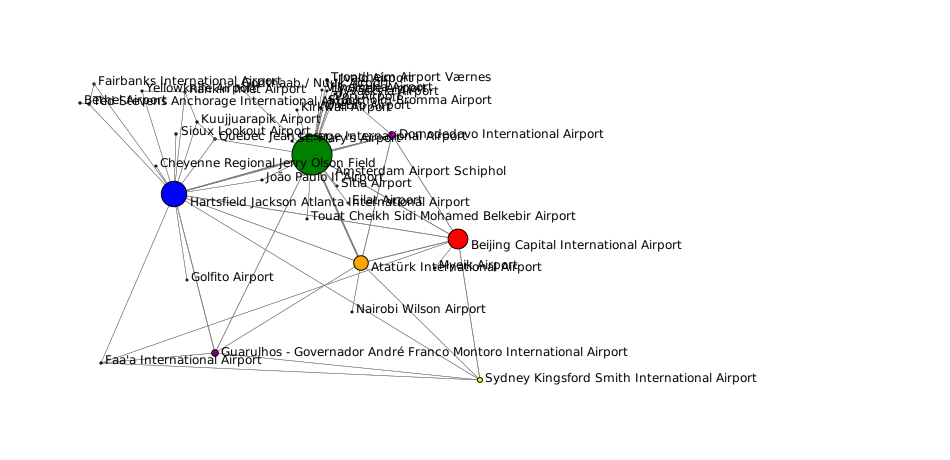

In [38]:
adjacency_aggregate = louvain.adjacency_
average = normalize(membership_matrix(labels).T)
position_aggregate = average.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)
image = svg_graph(adjacency_aggregate, position_aggregate, names=names[list_max],  display_node_weight=True, labels = labels_unique)
#labels=labels,
SVG(image)

In [39]:
nodes = labels_unique[np.where(counts>100)]

In [40]:
adjacency_aggregate_ = adjacency_aggregate.toarray()
cluster_strengths = ( np.diagonal( adjacency_aggregate_ ) ) / ( np.dot(adjacency_aggregate_,np.ones(np.shape(adjacency_aggregate_)[0])) )
argmax_strengths = np.argmax(cluster_strengths[nodes])
print(names[list_max[argmax_strengths]])

Beijing Capital International Airport


In [41]:
out_degrees = adjacency.dot(np.ones(adjacency.shape[0]))
print(names[list_max[argmax_strengths]])
print(out_degrees[list_max[argmax_strengths]])

Beijing Capital International Airport
332.0


## 2. Digraphs

## Wikipedia Vitals

In [42]:
graph = wikivitals

In [43]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank (with restart in the cluster).
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* What is the strongest cluster? the weakest cluster?
* Do the same experiments at resolution 2.

In [44]:
louvain = Louvain()
labels = louvain.fit_transform(adjacency)
#image = svg_graph(adjacency[:100][:100], labels = labels[:100], width=200, height=200)
#SVG(image)

In [45]:
labels_unique = np.unique(labels)

In [46]:
#pagerank = PageRank(damping_factor=0.85, solver='lanczos')
#pagerank = PageRank(damping_factor=0.85, solver='lanczos')
pagerank = PageRank()
scores = pagerank.fit_transform(adjacency)
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:20] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:20])
print(names[scores_ordered_arg[:20]])

[8527 2569 2155 8947 2722 2693 8758 2656 2721 3794  248 2703 2723 2748
 2741 2567 2657 2742 8744 2139]
[0.00405928 0.00211916 0.00175796 0.00166315 0.00156227 0.00155826
 0.00153055 0.00147292 0.00143966 0.00143154 0.00123284 0.00120197
 0.00117746 0.00112326 0.00110228 0.00108373 0.0010679  0.00106531
 0.00106036 0.00100658]
['Bibliothèque nationale de France' 'United States'
 'Geographic coordinate system' 'The New York Times' 'France' 'India'
 'Latin' 'China' 'United Kingdom' 'World War II' 'Encyclopædia Britannica'
 'Russia' 'Germany' 'Australia' 'Italy' 'Canada' 'Japan' 'Spain'
 'Greek language' 'Europe']


In [47]:
list_max = []
for i in np.unique(labels):
    mask = labels == i
    scores_mask = scores * mask
    max_per_cluster = scores_mask.argsort()[-5:][::-1]
    print(max_per_cluster)
    list_max.append(max_per_cluster)

print(list_max)

[ 701  975  864 1838  263]
[7596 7336 4498 8929 8051]
[2569 2155 2722 2693 2656]
[8758 8744 6992 3601 6993]
[2139 3563 3895 3678 2143]
[8527 8947  248 8967 8942]
[3775 8363 8894 7054 8639]
[array([ 701,  975,  864, 1838,  263]), array([7596, 7336, 4498, 8929, 8051]), array([2569, 2155, 2722, 2693, 2656]), array([8758, 8744, 6992, 3601, 6993]), array([2139, 3563, 3895, 3678, 2143]), array([8527, 8947,  248, 8967, 8942]), array([3775, 8363, 8894, 7054, 8639])]


In [48]:
for i in np.unique(labels_unique):
    print(f"Top 5 by label {i}:\n")
    for j in list_max[i]:
        #print(scores[j])
        print(names[j])
    print("--------------------------")


Top 5 by label 0:

Taxonomy (biology)
Animal
Protein
Bacteria
Oxford English Dictionary
--------------------------
Top 5 by label 1:

Oxygen
Earth
Mathematics
Nature (journal)
Physics
--------------------------
Top 5 by label 2:

United States
Geographic coordinate system
France
India
China
--------------------------
Top 5 by label 3:

Latin
Greek language
Christianity
Middle Ages
Islam
--------------------------
Top 5 by label 4:

Europe
Ottoman Empire
Russian Empire
British Empire
North America
--------------------------
Top 5 by label 5:

Bibliothèque nationale de France
The New York Times
Encyclopædia Britannica
BBC
Time (magazine)
--------------------------
Top 5 by label 6:

Industrial Revolution
Economics
Patent
Sharia
Syntax
--------------------------


In [49]:
#********************************
seed = []
arg = []
scores = []
for i in np.unique(labels):
    arg.append(np.argwhere(labels == i))
    #seed = {j:1 for j in arg}
#scores = pagerank.fit_transform(adjacency, {1084:1})
for i in np.unique(labels):
    seed_i = {j:1 for j in arg[i].ravel()}
    seed.append(seed_i)

In [50]:
test = seed[0]

In [51]:
scores = []
for i in np.unique(labels):
    pagerank = PageRank()
    score_i = pagerank.fit_transform(adjacency, seed[i])
    scores.append(score_i)

In [52]:
list_max = []
for i in np.unique(labels):
    mask = labels == i
    scores_mask = scores[i] * mask
    max_per_cluster = scores_mask.argsort()[-5:][::-1]
    print(max_per_cluster)
    list_max.append(max_per_cluster)

print(list_max)

[ 701  975  864  918 1838]
[4498 8051 7596 7586 7336]
[2569 2155 2722 2721 3794]
[8758 6992 8744 3521 3601]
[8798 2139 3563 3895 3717]
[8527 8947  248 8967 8942]
[8888 4194 8363 4261 8838]
[array([ 701,  975,  864,  918, 1838]), array([4498, 8051, 7596, 7586, 7336]), array([2569, 2155, 2722, 2721, 3794]), array([8758, 6992, 8744, 3521, 3601]), array([8798, 2139, 3563, 3895, 3717]), array([8527, 8947,  248, 8967, 8942]), array([8888, 4194, 8363, 4261, 8838])]


In [53]:
for i in np.unique(labels_unique):
    print(f"Top 5 by label {i}:\n")
    for j in list_max[i]:
        #print(scores[j])
        print(names[j])
    print("-----------------")

Top 5 by label 0:

Taxonomy (biology)
Animal
Protein
Plant
Bacteria
-----------------
Top 5 by label 1:

Mathematics
Physics
Oxygen
Hydrogen
Earth
-----------------
Top 5 by label 2:

United States
Geographic coordinate system
France
United Kingdom
World War II
-----------------
Top 5 by label 3:

Latin
Christianity
Greek language
Roman Empire
Middle Ages
-----------------
Top 5 by label 4:

Chinese language
Europe
Ottoman Empire
Russian Empire
Qing dynasty
-----------------
Top 5 by label 5:

Bibliothèque nationale de France
The New York Times
Encyclopædia Britannica
BBC
Time (magazine)
-----------------
Top 5 by label 6:

Common law
Marriage
Economics
Incest
Contract
-----------------


* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* What is the strongest cluster? the weakest cluster?
* Do the same experiments at resolution 2.

for i in np.unique(labels_unique):
    print(f"Top 5 by label {i}:\n")
    #names.append(names[j])
    for j in list_max[i]:
        print(j)
        #print(names[j])
    print("-----------------")

In [54]:
names2 = []
list_max2 = []
for j in list_max:
    print(j[0])
    names2.append(names[j[0]])
    list_max2.append(j[0])

701
4498
2569
8758
8798
8527
8888


In [55]:
list_max2

[701, 4498, 2569, 8758, 8798, 8527, 8888]

In [56]:
names2

['Taxonomy (biology)',
 'Mathematics',
 'United States',
 'Latin',
 'Chinese language',
 'Bibliothèque nationale de France',
 'Common law']

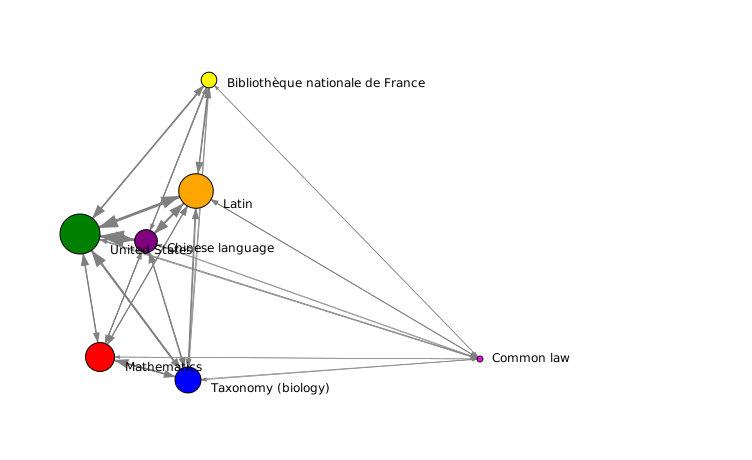

In [57]:
adjacency_aggregate = louvain.adjacency_
average = normalize(membership_matrix(labels).T)
#position_aggregate = average.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)
#image = svg_graph(adjacency_aggregate, names=names[list_max],  display_node_weight=True, labels = labels_unique)
image = svg_digraph(adjacency_aggregate,  display_node_weight=True, labels = labels_unique, names = names2)
SVG(image)


In [58]:
adjacency_aggregate_matrix = adjacency_aggregate.toarray()

In [59]:
adjacency_aggregate_ = adjacency_aggregate.toarray()
cluster_strengths = ( np.diagonal( adjacency_aggregate_ ) ) / ( np.dot(adjacency_aggregate_,np.ones(np.shape(adjacency_aggregate_)[0])) )
argmax_strengths = np.argmax(cluster_strengths)
print(names[list_max2[argmax_strengths]])

Mathematics


In [60]:
argmax_strengths = np.argmin(cluster_strengths)
print(names[list_max2[argmax_strengths]])

Common law


## 3. Bigraphs

## Cinema

In [61]:
graph = cinema

In [62]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* Cluster the graph by Louvain (resolution 1). Use ``BiLouvain``.
* List the 10 largest clusters and display the names of the top-5 actors and top-5 movies of each cluster in terms of Personalized BiPageRank.

In [63]:
bilouvain = BiLouvain()
bilouvain.fit_transform(biadjacency)

array([ 1,  0,  4, ..., 18, 22,  3])

In [64]:
labels_rows = bilouvain.labels_row_
labels_cols = bilouvain.labels_col_

In [65]:
labels_unique_rows, count_rows = np.unique(labels_rows, return_counts=True)
labels_unique_cols, count_cols = np.unique(labels_cols, return_counts=True)

In [66]:
print(np.size(labels_rows))
print(np.size(labels_cols))

88440
44586


In [67]:
print(np.size(movies))

88440


In [68]:
print(movies[labels_rows==0])

['$9.99' '$pent' "'71" ... '¡Cuatro!' 'Æon Flux'
 'İş Bank commercial featuring Atatürk']


In [69]:
print(actors[labels_cols==0])

['Anthony LaPaglia' 'Geoffrey Rush' 'Goldie Hawn' ... 'Daniel Valdez'
 'Shakira' 'Robyn Cohen']


* List the 10 largest clusters and display the names of the top-5 actors and top-5 movies of each cluster in terms of Personalized BiPageRank.

In [70]:
count = count_rows + count_cols

In [71]:
cluster10 = count.argsort()[-10:][::-1]

In [72]:
cluster10

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
seeds_col = []
seeds_row = []
for i in cluster10:
    position_cols = labels_cols==i
    
    position_cols = labels_cols==i
    position_rows = labels_rows==i
    seeds_col.append(dict(zip(position_cols, np.ones(position_cols.shape[0]).T)))
    seeds_row.append(dict(zip(position_rows, np.ones(position_rows.shape[0]).T)))
    

In [80]:
seeds_row[1]

{True: 1.0, False: 1.0}

In [81]:
for i in range(np.size(cluster10)):
    print("############")
    pagerank = BiPageRank()
    scores = pagerank.fit_transform(biadjacency, seeds_col=seeds_col[i], seeds_row = seeds_row[i])

############


IndexError: boolean index did not match indexed array along dimension 0; dimension is 88440 but corresponding boolean dimension is 2

In [ ]:
pagerank = BiPageRank()
scores = pagerank.fit_transform(biadjacency, seeds_col=seeds_col, seeds_row = seeds_row)

In [ ]:
pagerank = BiPageRank()
scores = pagerank.fit_transform(biadjacency)

In [ ]:
test = biadjacency.toarray()

In [ ]:
test[0]

In [ ]:
np.size(test)

In [ ]:
np.size(labels)

In [ ]:
# 10 best ranked
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:10] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:10])
print(movies[scores_ordered_arg[:10]])

In [ ]:
scores = pagerank.scores_col_
# 10 best ranked
scores_ordered_arg = np.argsort(scores)[::-1]
print( scores_ordered_arg[:10] )
scores_ordered = np.sort(scores)[::-1]
print(scores_ordered[:10])
print(actors[scores_ordered_arg[:10]])